In [2]:
import pandas as pd
import numpy as np

# Load the raw CSV files, specifying the encoding
releases_df = pd.read_csv('Releases 2000-2020.csv', encoding='latin-1') # or 'cp1252', or other potential encodings
disposals_df = pd.read_csv('Disposals and Transfers 00-20.csv', encoding='latin-1') # Use the same encoding as above if applicable
comments_df = pd.read_csv('Comments.csv', encoding='latin-1') # Use the same encoding as above if applicable

<ipython-input-2-0730e1a51c4c>:6: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  disposals_df = pd.read_csv('Disposals and Transfers 00-20.csv', encoding='latin-1') # Use the same encoding as above if applicable


In [3]:
# Function to summarize missing values, unique values, and zeros
def dataset_summary(df, name):
    summary = pd.DataFrame({
        'Missing Values': df.isnull().sum(),
        'Unique Values': df.nunique(),
        'Zeros Count': (df == 0).sum()
    })
    summary.loc['Total'] = summary.sum()
    print(f"\n===== Summary for {name} =====")
    print(summary)

# Apply summary function to each dataset
dataset_summary(releases_df, "Releases")
dataset_summary(disposals_df, "Disposals and Transfers")
dataset_summary(comments_df, "Comments")


===== Summary for Releases =====
                                                    Missing Values  \
Reporting_Year / Année                                           0   
NPRI_ID / No_INRP                                                0   
Number of employees                                            345   
Company_Name / Dénomination_sociale_de_l'entrep...               0   
Facility_Name / Installation                                  1083   
NAICS / Code_SCIAN                                               0   
NAICS Title / Titre Code_SCIAN                                   0   
PROVINCE                                                         0   
City                                                         27094   
Latitude                                                      2202   
Longitude                                                     2202   
CAS_Number / No_CAS                                              0   
Substance Name (English) / Nom de substance (An...      

In [4]:
def check_high_missing_columns(df, threshold=70):
    """
    Checks for columns in the DataFrame that have more than the specified percentage of missing values.

    Parameters:
    df (pd.DataFrame): The DataFrame to check.
    threshold (float): The percentage threshold for missing values (default is 70).

    Returns:
    list: A list of column names with more than the specified percentage of missing values.
    """
    # Calculate the percentage of missing values for each column
    missing_percentage = df.isnull().mean() * 100

    # Identify columns with more than the threshold percentage of missing values
    columns_to_check = missing_percentage[missing_percentage > threshold].index.tolist()

    return columns_to_check

# Example usage with three datasets
def check_datasets(file_paths):
    for file_path in file_paths:
        # Added encoding='latin-1' to pd.read_csv
        df = pd.read_csv(file_path, encoding='latin-1')
        high_missing_columns = check_high_missing_columns(df)
        print(f"\nColumns with >70% missing values in {file_path}:")
        if high_missing_columns:
            print(high_missing_columns)
        else:
            print("No columns with >70% missing values.")

# List of your dataset file paths
dataset_files = [
    'Releases 2000-2020.csv',
    'Disposals and Transfers 00-20.csv', # If this was meant to be 'Disposals and Transfers 00-20.csv', change accordingly.
    'Comments.csv'
]

# Check the datasets
check_datasets(dataset_files)


Columns with >70% missing values in Releases 2000-2020.csv:
['Release to Air - Fugitive', 'Release to Air - Other Non-Point ', 'Release to Air - Road dust  ', 'Release to Air - Spills ', 'Release to Air - Storage / Handling ', 'Releases to Land - Leaks', 'Releases to Land - Other ', 'Releases to Land - Spills ', 'Releases to Water Bodies - Direct Discharges ', 'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills ', 'Sum of release to all media (<1tonne)']


<ipython-input-4-9bbe1c228162>:24: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path, encoding='latin-1')



Columns with >70% missing values in Disposals and Transfers 00-20.csv:
['Off-site Disposal - Land Treatment', 'Off-site Disposal - Landfill', 'Off-site Disposal - Storage', 'Off-site Disposal - Tailings Management', 'Off-site Disposal - Underground Injection', 'Off-site Disposal - Waste Rock management', 'Off-site Transfers for Recycling - Energy Recovery', 'Off-site Transfers for Recycling - Other', 'Off-site Transfers for Recycling - Recovery of Acids and Bases', 'Off-site Transfers for Recycling - Recovery of Catalysts', 'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)', 'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds', 'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)', 'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues', 'Off-site Transfers for Recycling - Recovery of Solvents', 'Off-site Transfers for Recycling - Refining or Re-use of Used Oil', 'Off-site Transfer

In [5]:
import pandas as pd

# Function to drop specified columns from a DataFrame
def drop_columns(df, columns_to_drop):
    # Attempt to drop the columns, ignoring errors for any that do not exist
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')
    return df

# Load the datasets
releases_df = pd.read_csv('Releases 2000-2020.csv', encoding='latin-1')
disposals_df = pd.read_csv('Disposals and Transfers 00-20.csv', encoding='latin-1')
comments_df = pd.read_csv('Comments.csv', encoding='latin-1')

# Clean column names by stripping whitespace
releases_df.columns = releases_df.columns.str.strip()
disposals_df.columns = disposals_df.columns.str.strip()
comments_df.columns = comments_df.columns.str.strip()

# Print the actual column names for debugging
print("Columns in Releases DataFrame:", releases_df.columns.tolist())
print("Columns in Disposals DataFrame:", disposals_df.columns.tolist())

# Columns to drop based on previous analysis which are not related to our problem because we were facing runtime error everytime we did.
columns_to_drop_releases = [
    'Release to Air - Fugitive',
    'Release to Air - Other Non-Point',
    'Release to Air - Road dust',
    'Release to Air - Spills',
    'Release to Air - Storage / Handling',
    'Releases to Land - Leaks',
    'Releases to Land - Other',
    'Releases to Land - Spills',
    'Releases to Water Bodies - Direct Discharges',
    'Releases to Water Bodies - Leaks',
    'Releases to Water Bodies - Spills',
    'Sum of release to all media (<1tonne)'
]

columns_to_drop_disposals = [
    'Off-site Disposal - Land Treatment',
    'Off-site Disposal - Landfill',
    'Off-site Disposal - Storage',
    'Off-site Disposal - Tailings Management',
    'Off-site Disposal - Underground Injection',
    'Off-site Disposal - Waste Rock management',
    'Off-site Transfers for Recycling - Energy Recovery',
    'Off-site Transfers for Recycling - Other',
    'Off-site Transfers for Recycling - Recovery of Acids and Bases',
    'Off-site Transfers for Recycling - Recovery of Catalysts',
    'Off-site Transfers for Recycling - Recovery of Organic Substances (not solvents)',
    'Off-site Transfers for Recycling - Recovery of Pollution Abatement Residues',
    'Off-site Transfers for Recycling - Recovery of Solvents',
    'Off-site Transfers for Recycling - Refining or Re-use of Used Oil',
    'Off-site Transfers for Treatment Prior to Final Disposal - Biological Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Chemical Treatment',
    'Off-site Transfers for Treatment Prior to Final Disposal - Incineration / Thermal',
    'Off-site Transfers for Treatment Prior to Final Disposal - Municipal Sewage Treatment Plant',
    'Off-site Transfers for Treatment Prior to Final Disposal - Physical Treatment',
    'On-site Disposal - Land Treatment',
    'On-site Disposal - Landfill',
    'On-site Disposal - Tailings Management',
    'On-site Disposal - Underground Injection',
    'On-site Disposal - Waste Rock management'
]

# Drop the specified columns
cleaned_releases_df = drop_columns(releases_df, columns_to_drop_releases)
cleaned_disposals_df = drop_columns(disposals_df, columns_to_drop_disposals)

# Optional: Check the cleaned DataFrames
print("\nCleaned DataFrame for Releases:")
print(cleaned_releases_df.info())

print("\nCleaned DataFrame for Disposals and Transfers:")
print(cleaned_disposals_df.info())

# Optionally, save the cleaned DataFrames to new CSV files
cleaned_releases_df.to_csv('cleaned_releases.csv', index=False)
cleaned_disposals_df.to_csv('cleaned_disposals.csv', index=False)
print("\nCleaned data saved to 'cleaned_releases.csv' and 'cleaned_disposals.csv'.")

<ipython-input-5-83bff70af58b>:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  disposals_df = pd.read_csv('Disposals and Transfers 00-20.csv', encoding='latin-1')


Columns in Releases DataFrame: ['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees', "Company_Name / Dénomination_sociale_de_l'entreprise", 'Facility_Name / Installation', 'NAICS / Code_SCIAN', 'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude', 'Longitude', 'CAS_Number / No_CAS', 'Substance Name (English) / Nom de substance (Anglais)', 'Units / Unités', 'Estimation_Method / Méthode_d\x92estimation', 'Release to Air - Fugitive', 'Release to Air - Other Non-Point', 'Release to Air - Road dust', 'Release to Air - Spills', 'Release to Air - Stack / Point', 'Release to Air - Storage / Handling', 'Releases to Land - Leaks', 'Releases to Land - Other', 'Releases to Land - Spills', 'Releases to Water Bodies - Direct Discharges', 'Releases to Water Bodies - Leaks', 'Releases to Water Bodies - Spills', 'Sum of release to all media (<1tonne)']
Columns in Disposals DataFrame: ['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees', "Company_Name / Déno

In [6]:
cleaned_releases_df.reset_index(drop=True, inplace=True)
cleaned_releases_df.to_csv('cleaned_releases.csv', index=False)

cleaned_disposals_df.reset_index(drop=True, inplace=True)
cleaned_disposals_df.to_csv('cleaned_disposals.csv', index=False)

In [7]:
# Define a function to detect outliers using IQR
def detect_outliers_iqr(df):
    outlier_summary = {}
    for column in df.select_dtypes(include=['number']).columns:  # Only numerical columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_summary[column] = len(outliers)  # Count of outliers in each column
    return pd.DataFrame.from_dict(outlier_summary, orient='index', columns=['Outlier Count'])

# Run the function on your dataset
outliers_releases = detect_outliers_iqr(cleaned_releases_df)
outliers_disposals = detect_outliers_iqr(cleaned_disposals_df)
Outliers_comments = detect_outliers_iqr(comments_df)

# Print results
print("\n===== Outliers in Cleaned Releases Dataset =====")
print(outliers_releases)
print("\n===== Outliers in Cleaned Disposals Dataset =====")
print(outliers_disposals)
print("\n===== Outliers in Comments Dataset =====")
print(Outliers_comments)


===== Outliers in Cleaned Releases Dataset =====
                                Outlier Count
Reporting_Year / Année                      0
NPRI_ID / No_INRP                           0
Number of employees                     54917
NAICS / Code_SCIAN                      19430
Latitude                                 2750
Longitude                                 783
Release to Air - Stack / Point          52491

===== Outliers in Cleaned Disposals Dataset =====
                                                    Outlier Count
Reporting_Year / Année                                          0
NPRI_ID / No_INRP                                           18757
NAICS / Code_SCIAN                                          14201
Latitude                                                     1426
Longitude                                                     268
Off-site Transfers for Recycling - Recovery of ...            288
Off-site Transfers for Recycling - Recovery of ...           5176

==

In [8]:
# Load datasets with low_memory set to False
cleaned_releases_df = pd.read_csv('cleaned_releases.csv', low_memory=False)
cleaned_disposals_df = pd.read_csv('cleaned_disposals.csv', low_memory=False)

# Remove duplicate rows from each dataset (modifying them in place)
cleaned_releases_df.drop_duplicates(inplace=True)
cleaned_disposals_df.drop_duplicates(inplace=True)

# Print confirmation
print("Duplicate rows removed from both datasets.")


Duplicate rows removed from both datasets.


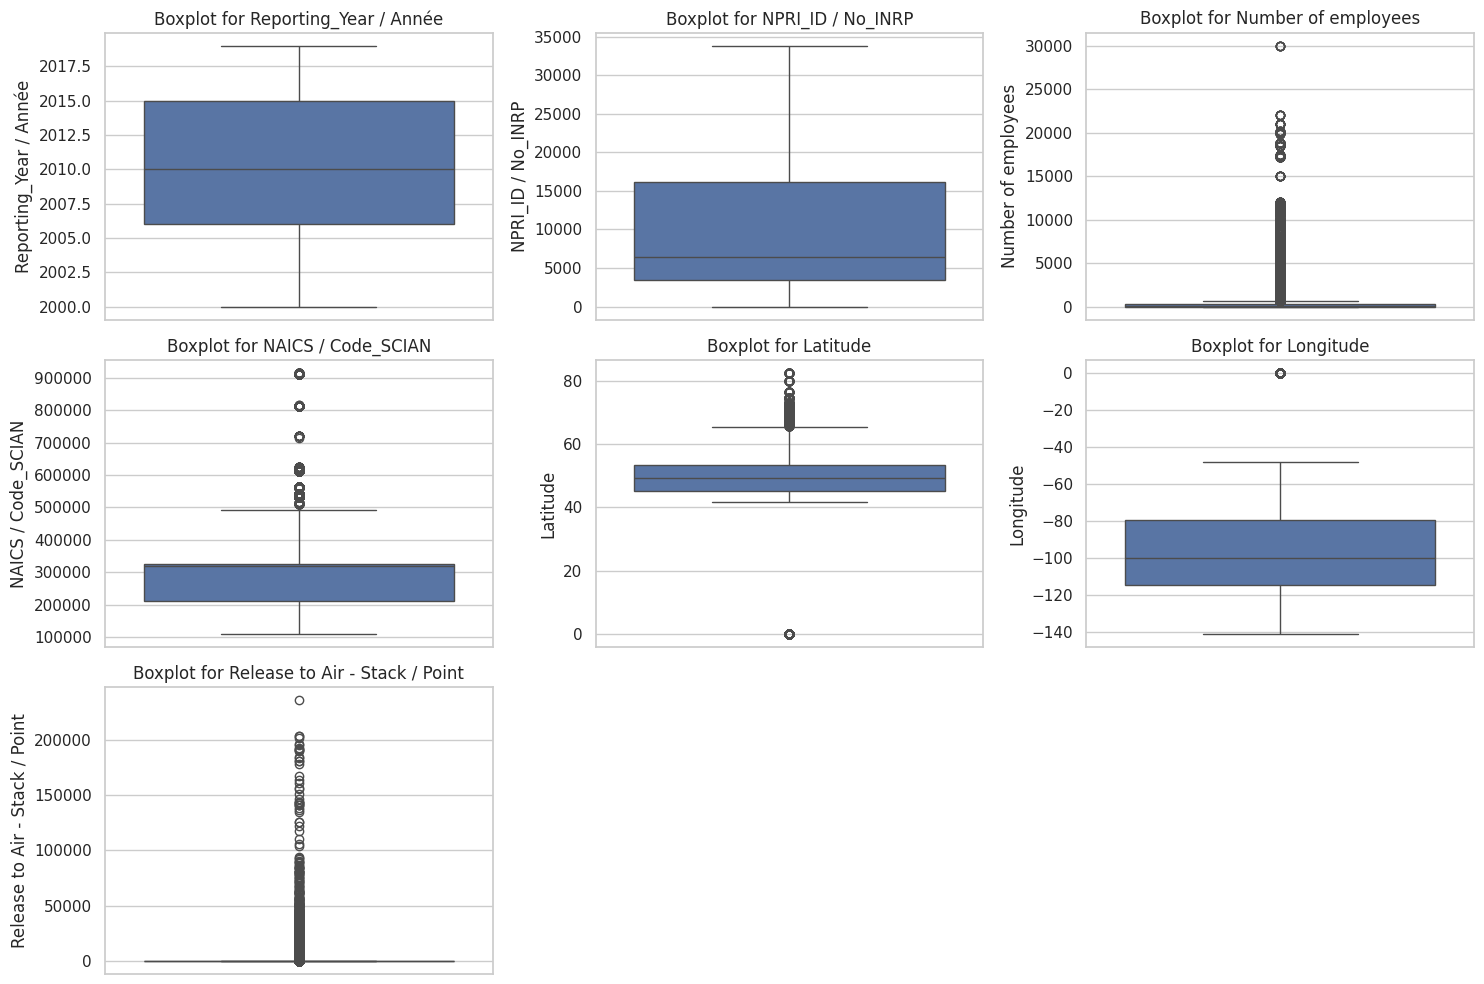

In [9]:
# Before doing any eda
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset (modify the path as necessary)
cleaned_releases_df = pd.read_csv('cleaned_releases.csv', low_memory=False)

# Set the style for the plots
sns.set(style="whitegrid")

# Specify the numerical columns you want to analyze for outliers
numerical_columns = cleaned_releases_df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)  # Adjust layout based on the number of columns
    sns.boxplot(y=cleaned_releases_df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

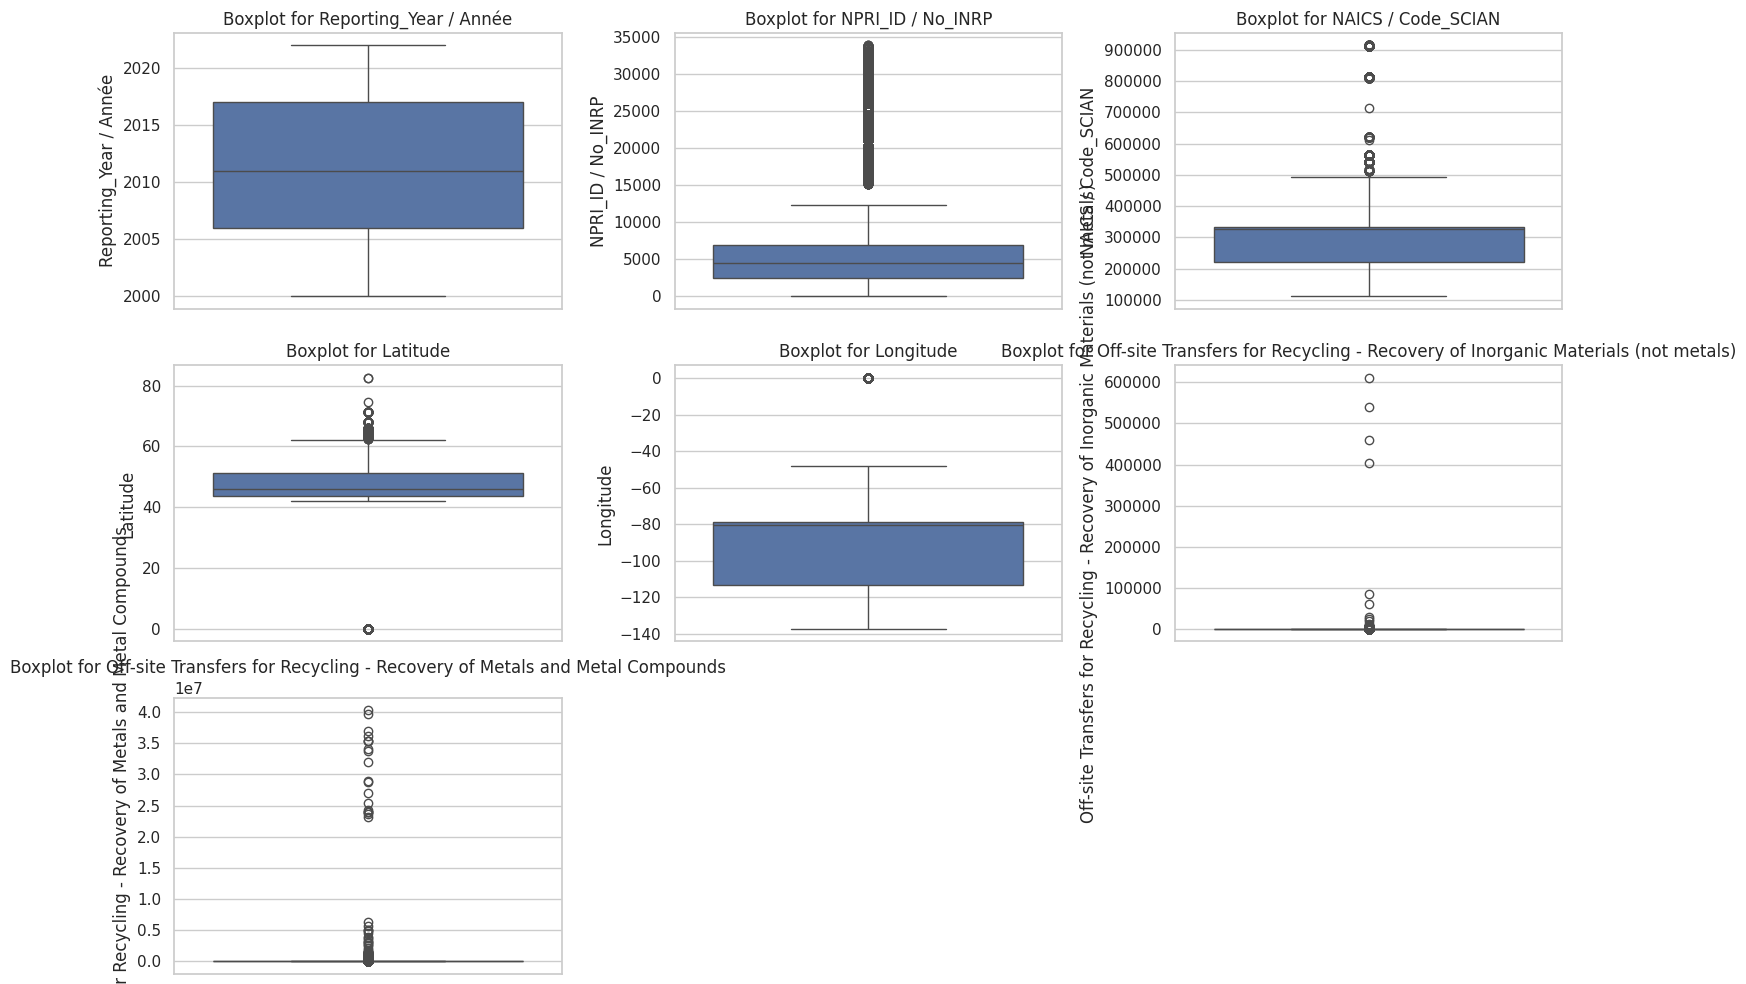

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your cleaned dataset (modify the path as necessary)
cleaned_releases_df = pd.read_csv('cleaned_disposals.csv', low_memory=False)

# Set the style for the plots
sns.set(style="whitegrid")

# Specify the numerical columns you want to analyze for outliers
numerical_columns = cleaned_releases_df.select_dtypes(include=['number']).columns

# Create boxplots for each numerical column
plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns)//3 + 1, 3, i)  # Adjust layout based on the number of columns
    sns.boxplot(y=cleaned_releases_df[column])
    plt.title(f'Boxplot for {column}')

plt.tight_layout()
plt.show()

In [11]:
import pandas as pd

# Load datasets with low_memory set to False
cleaned_releases_df = pd.read_csv('cleaned_releases.csv', low_memory=False)
cleaned_disposals_df = pd.read_csv('cleaned_disposals.csv', low_memory=False)

# Print column names to identify problematic ones
print("Columns in Cleaned Releases Dataset:", cleaned_releases_df.columns)
print("Columns in Cleaned Disposals Dataset:", cleaned_disposals_df.columns)

# Function to impute missing values
def impute_missing_values(df):
    # Impute numerical columns with mean or median
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    for col in numerical_cols:
        df[col].fillna(df[col].median(), inplace=True)  # Use median for numerical columns

    # Impute categorical columns with mode
    categorical_cols = df.select_dtypes(include=['object']).columns
    for col in categorical_cols:
        df[col].fillna(df[col].mode()[0], inplace=True)  # Use mode for categorical columns

    return df

# Impute missing values for both datasets
cleaned_releases_df = impute_missing_values(cleaned_releases_df)
cleaned_disposals_df = impute_missing_values(cleaned_disposals_df)

# Check for missing values after imputation
print("Missing Values After Imputation (Releases):\n", cleaned_releases_df.isnull().sum())
print("\nMissing Values After Imputation (Disposals):\n", cleaned_disposals_df.isnull().sum())

Columns in Cleaned Releases Dataset: Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Release to Air - Stack / Point'],
      dtype='object')
Columns in Cleaned Disposals Dataset: Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estima

<ipython-input-11-ca486e43bec2>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)  # Use median for numerical columns
<ipython-input-11-ca486e43bec2>:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].me

Missing Values After Imputation (Releases):
 Reporting_Year / Année                                   0
NPRI_ID / No_INRP                                        0
Number of employees                                      0
Company_Name / Dénomination_sociale_de_l'entreprise      0
Facility_Name / Installation                             0
NAICS / Code_SCIAN                                       0
NAICS Title / Titre Code_SCIAN                           0
PROVINCE                                                 0
City                                                     0
Latitude                                                 0
Longitude                                                0
CAS_Number / No_CAS                                      0
Substance Name (English) / Nom de substance (Anglais)    0
Units / Unités                                           0
Estimation_Method / Méthode_destimation                 0
Release to Air - Stack / Point                           0
dtype: int6

In [12]:
def cap_outliers(df, lower_percentile=0.01, upper_percentile=0.99):
    capped_df = df.copy()

    for column in capped_df.select_dtypes(include=['number']).columns:
        lower_limit = capped_df[column].quantile(lower_percentile)
        upper_limit = capped_df[column].quantile(upper_percentile)

        # Cap the outliers
        capped_df[column] = capped_df[column].clip(lower=lower_limit, upper=upper_limit)

    return capped_df

# Assuming cleaned_releases_df, cleaned_disposals_df, and comments_df are your DataFrames
capped_releases_df = cap_outliers(cleaned_releases_df)
capped_disposals_df = cap_outliers(cleaned_disposals_df)
capped_comments_df = cap_outliers(comments_df)

# Optionally, check the summary statistics after capping
print(capped_releases_df.describe())
print(capped_disposals_df.describe())
print(capped_comments_df.describe())

       Reporting_Year / Année  NPRI_ID / No_INRP  Number of employees  \
count           580038.000000      580038.000000        580038.000000   
mean              2010.004474        9553.792048           264.818826   
std                  5.270238        8046.490292           641.799496   
min               2000.000000         163.000000             0.000000   
25%               2006.000000        3419.000000             4.000000   
50%               2010.000000        6384.000000            55.000000   
75%               2015.000000       16209.000000           250.000000   
max               2019.000000       29575.000000          4600.000000   

       NAICS / Code_SCIAN       Latitude      Longitude  \
count       580038.000000  580038.000000  580038.000000   
mean        293388.209938      49.305554     -96.036757   
std          84996.492723       4.628530      19.894743   
min         211110.000000      42.310520    -125.118300   
25%         211113.000000      45.228300    -11

Column Names in the Dataset:
Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Release to Air - Stack / Point'],
      dtype='object')


<ipython-input-13-93214d411806>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Release to Air - Stack / Point'] = pd.to_numeric(df_filtered['Release to Air - Stack / Point'], errors='coerce')


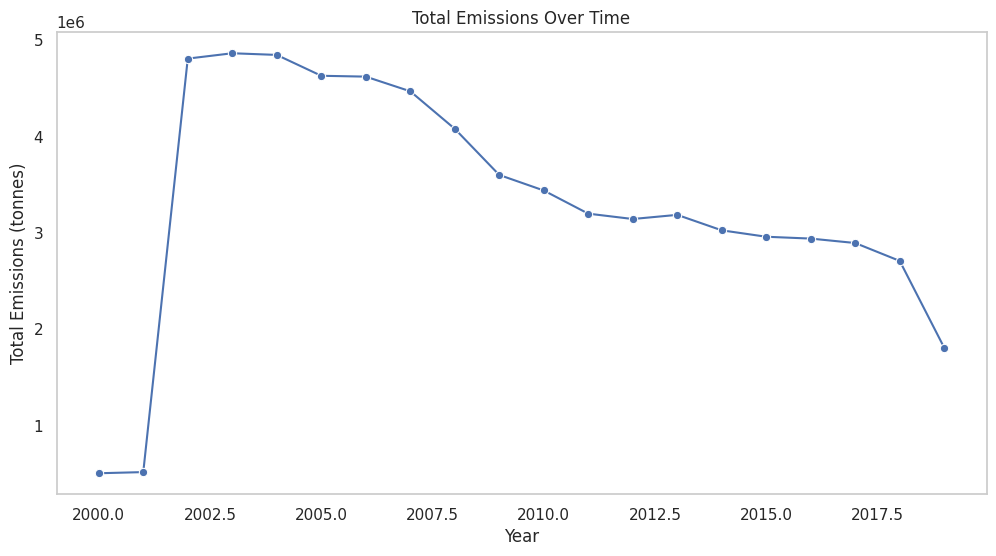

<ipython-input-13-93214d411806>:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=substance_emissions.sort_values(by='Release to Air - Stack / Point', ascending=False).head(10),


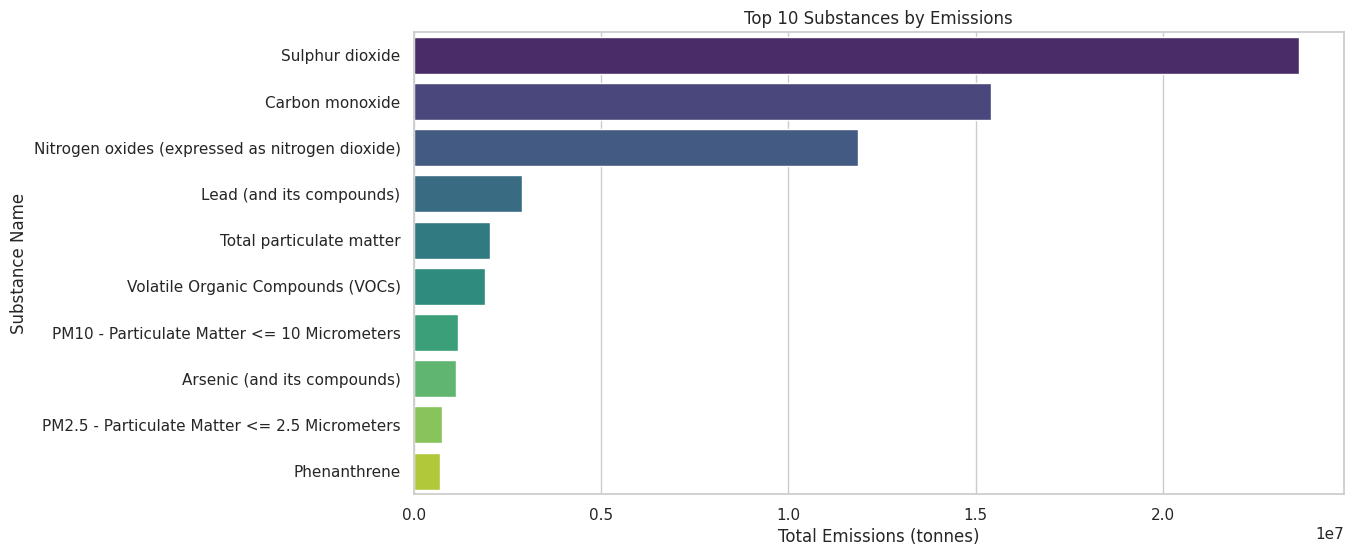

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
cleaned_releases_df = pd.read_csv('cleaned_releases.csv', low_memory=False)

# Print out the actual column names to check for discrepancies
print("Column Names in the Dataset:")
print(cleaned_releases_df.columns)

# Clean column names by stripping any leading/trailing whitespace
cleaned_releases_df.columns = cleaned_releases_df.columns.str.strip()

# Define the columns of interest based on the actual dataset
columns_of_interest = [
    'Reporting_Year / Année',  # Adjusted based on actual name
    'Substance Name (English) / Nom de substance (Anglais)',
    'Release to Air - Stack / Point',
    'Company_Name / Dénomination_sociale_de_l\'entreprise',
    'NAICS Title / Titre Code_SCIAN',
]

# Filter the DataFrame to include only the relevant columns
df_filtered = cleaned_releases_df[columns_of_interest]

# Convert Release to Air to numeric, if necessary
df_filtered['Release to Air - Stack / Point'] = pd.to_numeric(df_filtered['Release to Air - Stack / Point'], errors='coerce')

# Example 1: Line Plot for Total Emissions Over Time
total_emissions = df_filtered.groupby('Reporting_Year / Année')['Release to Air - Stack / Point'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=total_emissions, x='Reporting_Year / Année', y='Release to Air - Stack / Point', marker='o')
plt.title('Total Emissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Emissions (tonnes)')
plt.grid()
plt.show()

# Example 2: Bar Plot for Emissions by Substance
substance_emissions = df_filtered.groupby('Substance Name (English) / Nom de substance (Anglais)')['Release to Air - Stack / Point'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=substance_emissions.sort_values(by='Release to Air - Stack / Point', ascending=False).head(10),
            x='Release to Air - Stack / Point',
            y='Substance Name (English) / Nom de substance (Anglais)',
            palette='viridis')
plt.title('Top 10 Substances by Emissions')
plt.xlabel('Total Emissions (tonnes)')
plt.ylabel('Substance Name')
plt.show()


<ipython-input-15-f31c51180414>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=naics_emissions.sort_values(by='Release to Air - Stack / Point', ascending=False).head(10),


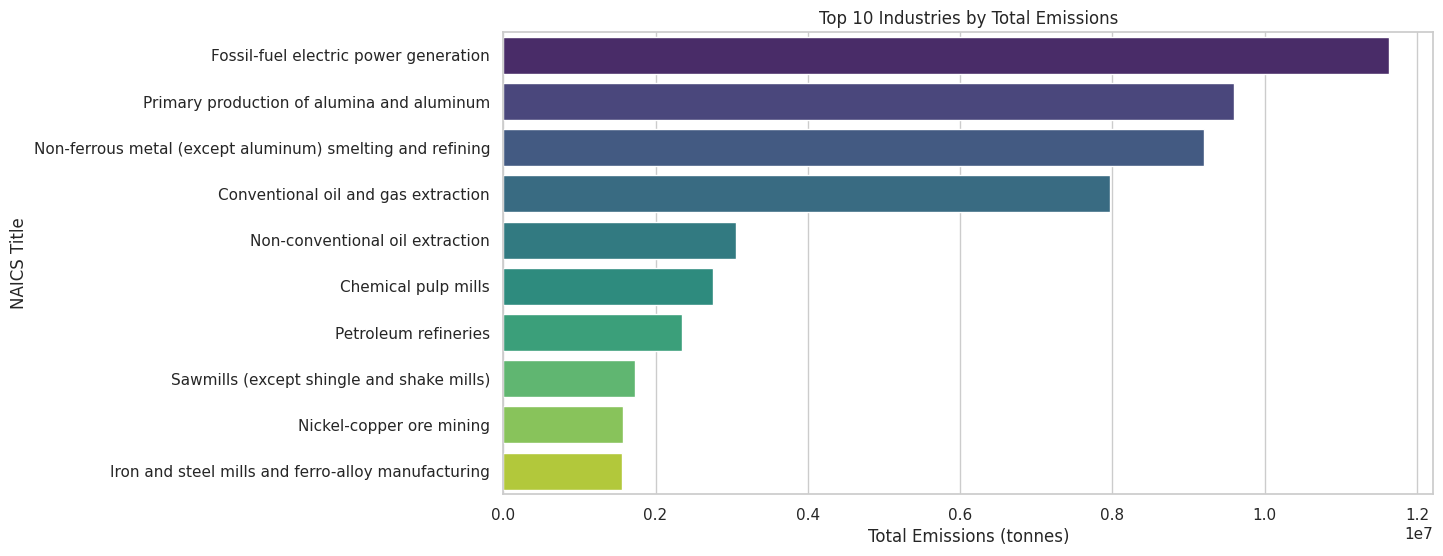

<ipython-input-15-f31c51180414>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_emissions.sort_values(by='Release to Air - Stack / Point', ascending=False).head(10),


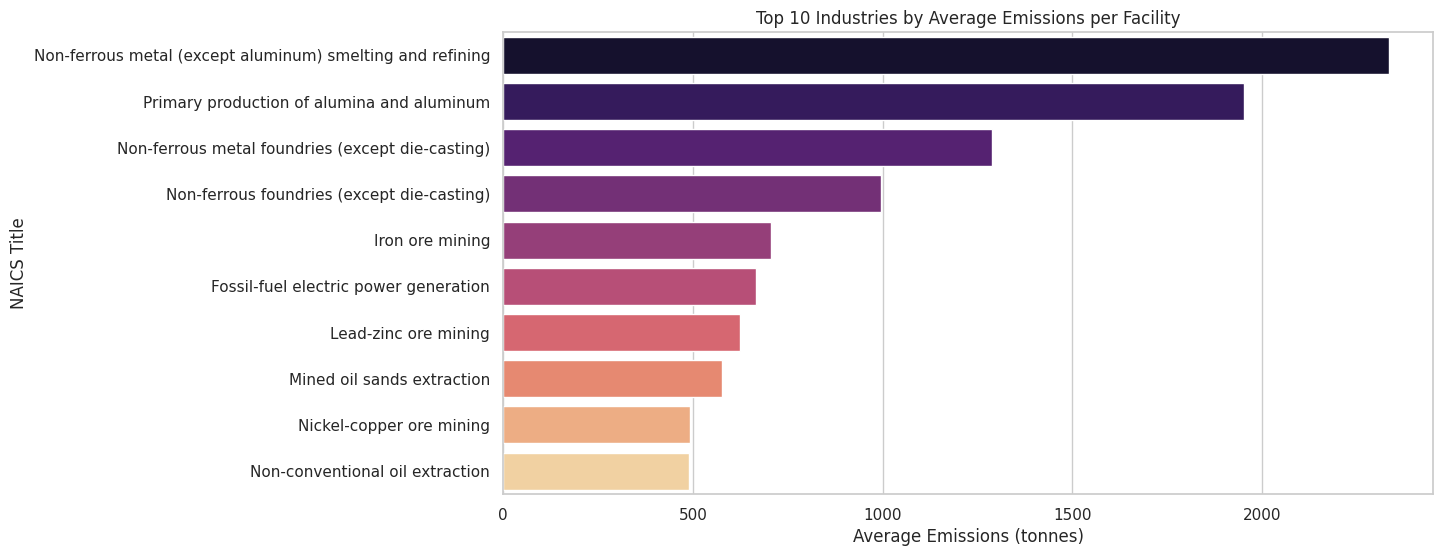

In [15]:
# Load your dataset
cleaned_releases_df = pd.read_csv('cleaned_releases.csv', low_memory=False)

# Clean column names
cleaned_releases_df.columns = cleaned_releases_df.columns.str.strip()

# Convert Release to Air to numeric
cleaned_releases_df['Release to Air - Stack / Point'] = pd.to_numeric(cleaned_releases_df['Release to Air - Stack / Point'], errors='coerce')

# Example 1: Total Emissions by NAICS Title
naics_emissions = cleaned_releases_df.groupby('NAICS Title / Titre Code_SCIAN')['Release to Air - Stack / Point'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=naics_emissions.sort_values(by='Release to Air - Stack / Point', ascending=False).head(10),
            x='Release to Air - Stack / Point',
            y='NAICS Title / Titre Code_SCIAN',
            palette='viridis')
plt.title('Top 10 Industries by Total Emissions')
plt.xlabel('Total Emissions (tonnes)')
plt.ylabel('NAICS Title')
plt.show()

# Example 2: Average Emissions by NAICS Title
average_emissions = cleaned_releases_df.groupby('NAICS Title / Titre Code_SCIAN')['Release to Air - Stack / Point'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=average_emissions.sort_values(by='Release to Air - Stack / Point', ascending=False).head(10),
            x='Release to Air - Stack / Point',
            y='NAICS Title / Titre Code_SCIAN',
            palette='magma')
plt.title('Top 10 Industries by Average Emissions per Facility')
plt.xlabel('Average Emissions (tonnes)')
plt.ylabel('NAICS Title')
plt.show()


Column Names in the Dataset:
Index(['Reporting_Year / Année', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dénomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Unités', 'Estimation_Method / Méthode_destimation',
       'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
       'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds'],
      dtype='object')


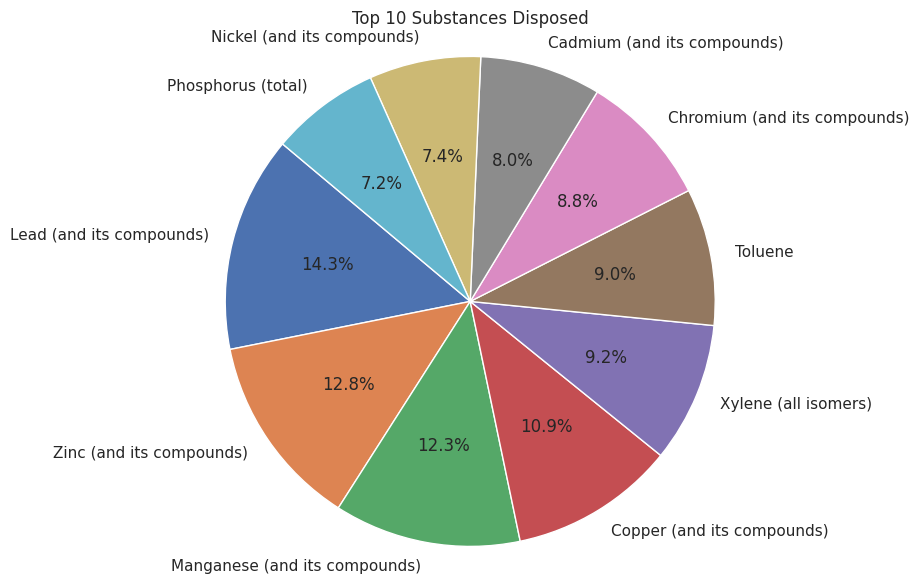

In [16]:
# Clean column names
cleaned_disposals_df.columns = cleaned_disposals_df.columns.str.strip()

# Print column names to check for discrepancies
print("Column Names in the Dataset:")
print(cleaned_disposals_df.columns)

# Convert the amount based on the 'Units / UnitÃ©s' column
# Assuming the data in the dataset indicates amounts directly in 'tonnes' or 'kg'
cleaned_disposals_df['Disposal Amount'] = 1  # Placeholder for actual values if they're in rows directly

# Example 1: Pie Chart for Substance Distribution
substance_distribution = cleaned_disposals_df['Substance Name (English) / Nom de substance (Anglais)'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(substance_distribution.head(10), labels=substance_distribution.index[:10], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Substances Disposed')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

<ipython-input-17-a96c64948328>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Reporting_Year / AnnÃ©e', palette="coolwarm")


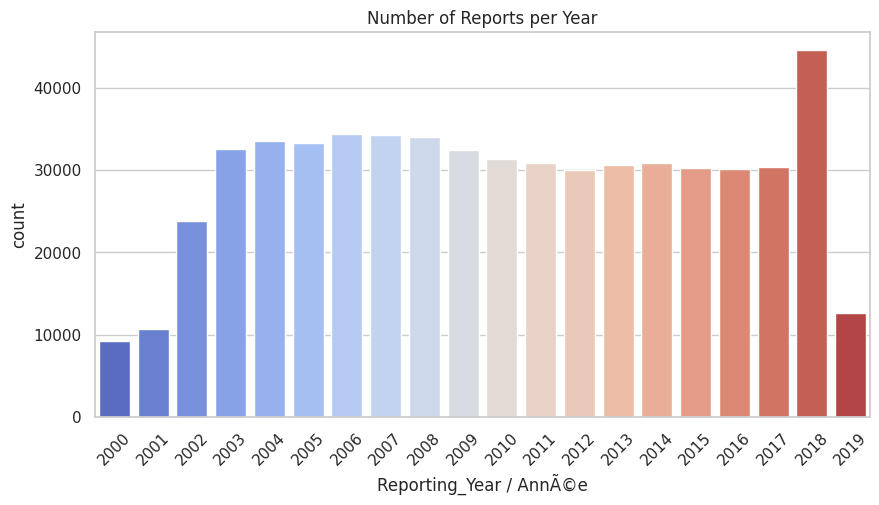

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
# Load your dataset (Make sure the file name is correct)
df = pd.read_csv("cleaned_releases.csv", encoding="latin-1")  # Adjust encoding if needed
df.columns = df.columns.str.strip()  # Remove spaces

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Reporting_Year / AnnÃ©e', palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Number of Reports per Year")
plt.show()

<ipython-input-18-38fb21c24472>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=province_emissions.index, y=province_emissions.values, palette="coolwarm")


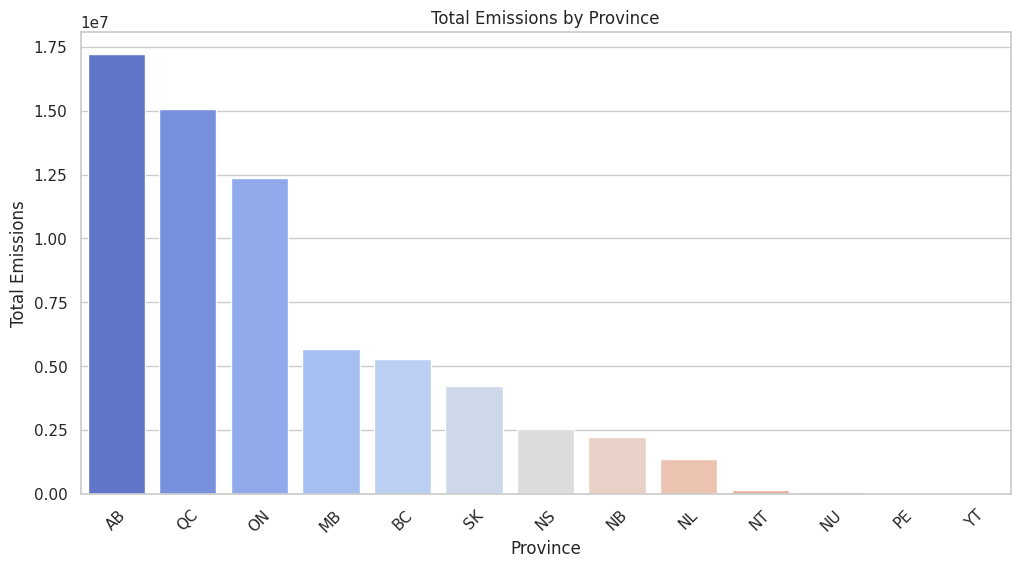

In [18]:
df = pd.read_csv("cleaned_releases.csv", encoding="latin-1")  # Adjust encoding if needed

plt.figure(figsize=(12, 6))

province_emissions = df.groupby('PROVINCE')['Release to Air - Stack / Point'].sum().sort_values(ascending=False)
sns.barplot(x=province_emissions.index, y=province_emissions.values, palette="coolwarm")
plt.title("Total Emissions by Province")
plt.xlabel("Province")
plt.xticks(rotation=45)
plt.ylabel("Total Emissions")
plt.show()

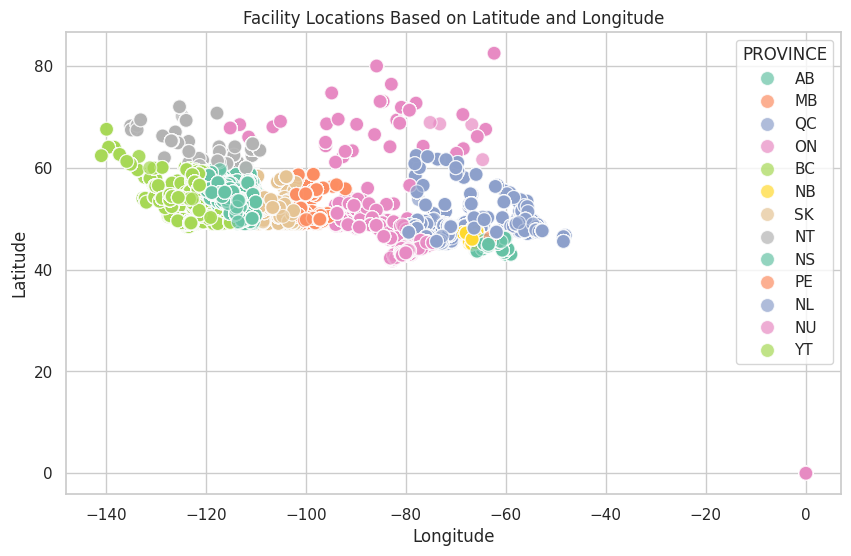

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns


# Remove NaN values for latitude and longitude before plotting
df_cleaned = df.dropna(subset=['Latitude', 'Longitude'])

# Scatter plot for Latitude and Longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_cleaned, x='Longitude', y='Latitude', hue='PROVINCE', palette='Set2', s=100, alpha=0.7)
plt.title('Facility Locations Based on Latitude and Longitude')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='PROVINCE')
plt.show()

<ipython-input-20-ba9166f00e89>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=province_employee_count, x='PROVINCE', y='Number of employees', palette='viridis')


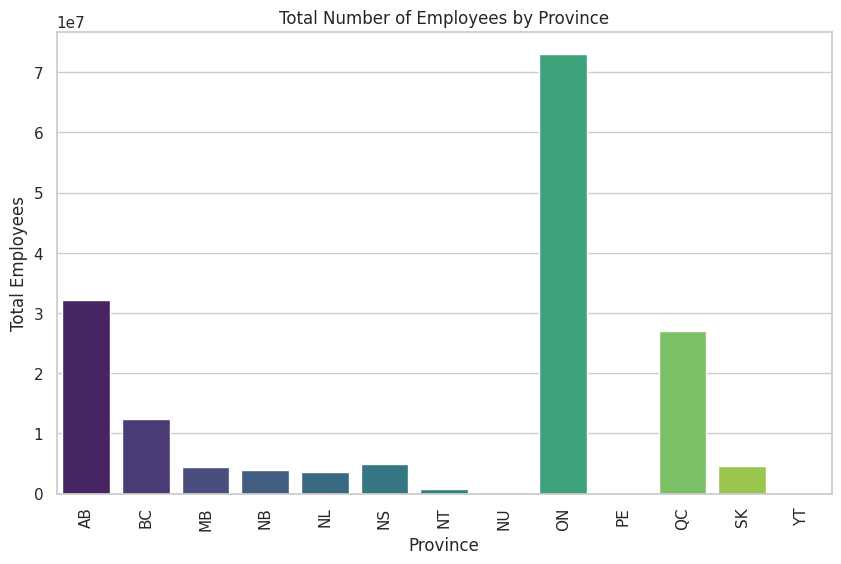

In [20]:
# Group by Province and sum up the number of employees
province_employee_count = df.groupby('PROVINCE')['Number of employees'].sum().reset_index()

# Bar plot for employees by province
plt.figure(figsize=(10, 6))
sns.barplot(data=province_employee_count, x='PROVINCE', y='Number of employees', palette='viridis')
plt.title('Total Number of Employees by Province')
plt.xlabel('Province')
plt.ylabel('Total Employees')
plt.xticks(rotation=90)
plt.show()

<ipython-input-21-65d242664f8b>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=substance_count.head(10), x='Substance', y='Count', palette='Blues_d')


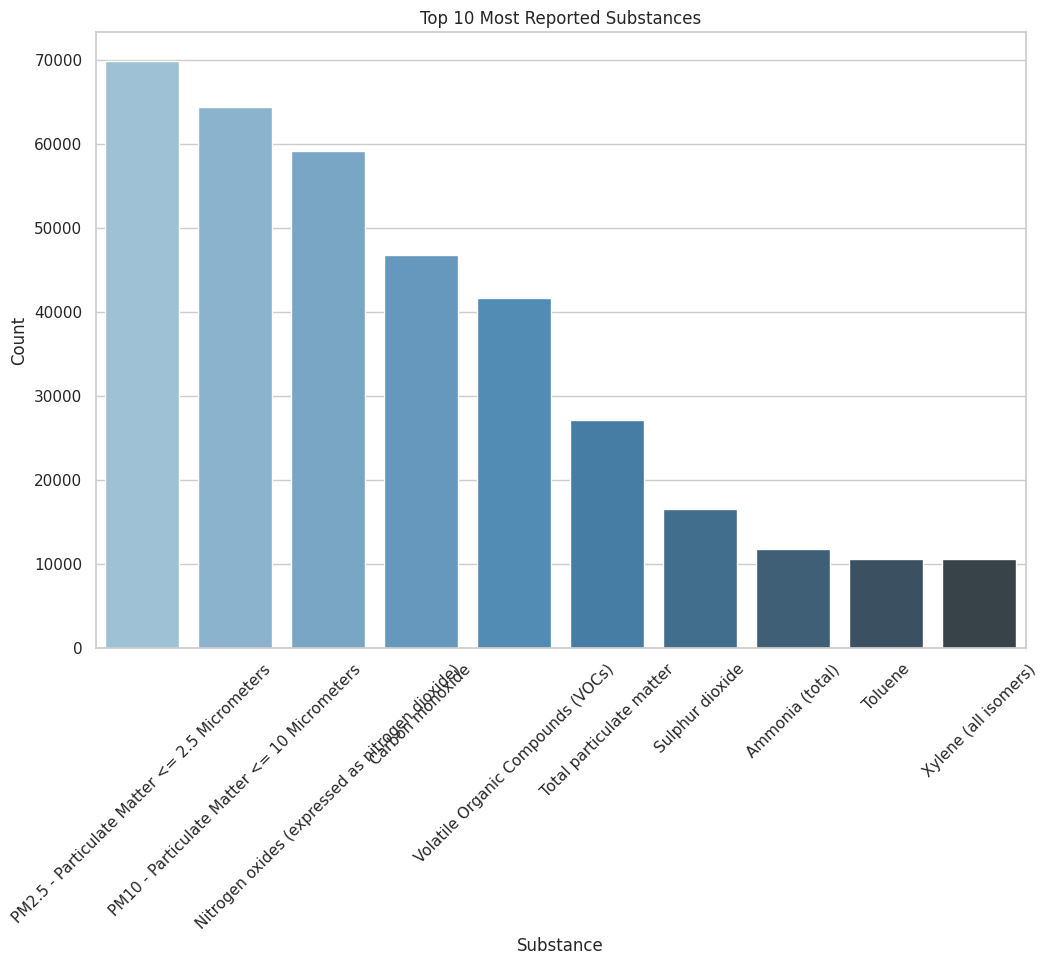

In [21]:
# Count occurrences of each substance
substance_count = df['Substance Name (English) / Nom de substance (Anglais)'].value_counts().reset_index()
substance_count.columns = ['Substance', 'Count']

# Bar plot for substance counts
plt.figure(figsize=(12, 8))
sns.barplot(data=substance_count.head(10), x='Substance', y='Count', palette='Blues_d')
plt.title('Top 10 Most Reported Substances')
plt.xlabel('Substance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

<ipython-input-22-b681239fbd83>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=naics_count.head(10), x='NAICS Code', y='Count', palette='RdYlBu')


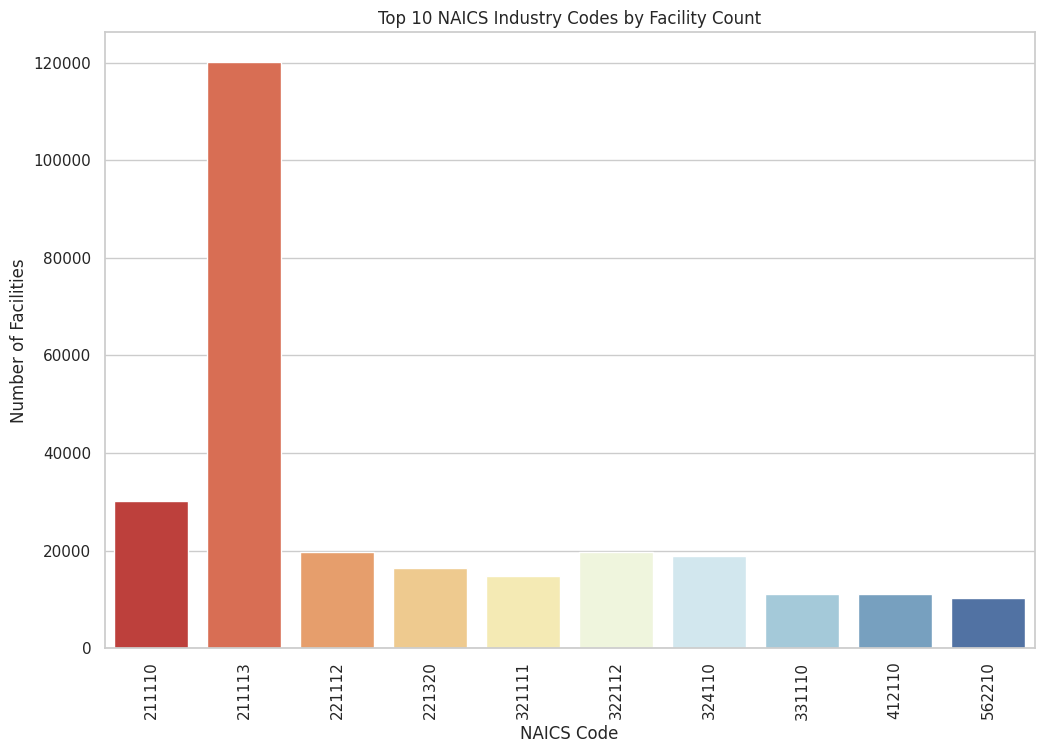

In [22]:
# Count the number of occurrences of each NAICS code
naics_count = df['NAICS / Code_SCIAN'].value_counts().reset_index()
naics_count.columns = ['NAICS Code', 'Count']

# Bar plot for NAICS code counts
plt.figure(figsize=(12, 8))
sns.barplot(data=naics_count.head(10), x='NAICS Code', y='Count', palette='RdYlBu')
plt.title('Top 10 NAICS Industry Codes by Facility Count')
plt.xlabel('NAICS Code')
plt.ylabel('Number of Facilities')
plt.xticks(rotation=90)
plt.show()

<ipython-input-23-00e70d4d3d4b>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_disposals.csv", encoding="latin-1")  # Adjust encoding if needed


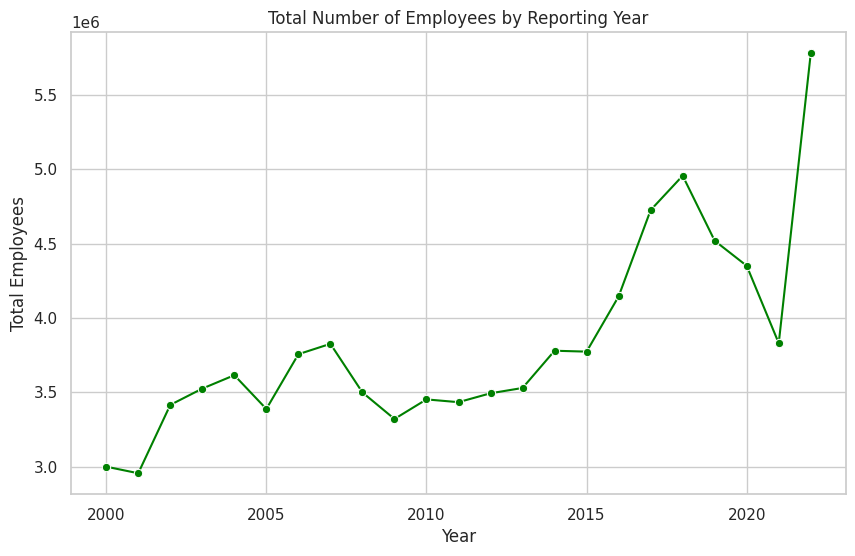

In [23]:
# Load your dataset (Make sure the file name is correct)
df = pd.read_csv("cleaned_disposals.csv", encoding="latin-1")  # Adjust encoding if needed
df.columns = df.columns.str.strip()  # Remove spaces

# Convert 'Number of employees' to numeric, handling errors
df['Number of employees'] = pd.to_numeric(df['Number of employees'], errors='coerce')

# Aggregate number of employees by year
employees_by_year = df.groupby('Reporting_Year / AnnÃ©e')['Number of employees'].sum().reset_index()

# Line plot for employees by year
plt.figure(figsize=(10, 6))
sns.lineplot(data=employees_by_year, x='Reporting_Year / AnnÃ©e', y='Number of employees', marker='o', color='green')
plt.title('Total Number of Employees by Reporting Year')
plt.xlabel('Year')
plt.ylabel('Total Employees')
plt.show()

<ipython-input-24-3d253ee0eb6f>:2: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("cleaned_disposals.csv", encoding="latin-1")  # Adjust encoding if needed
<ipython-input-24-3d253ee0eb6f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=estimation_method_count, x='Estimation Method', y='Count', palette='Set1')


Index(['Reporting_Year / Anne', 'NPRI_ID / No_INRP', 'Number of employees',
       'Company_Name / Dnomination_sociale_de_l'entreprise',
       'Facility_Name / Installation', 'NAICS / Code_SCIAN',
       'NAICS Title / Titre Code_SCIAN', 'PROVINCE', 'City', 'Latitude',
       'Longitude', 'CAS_Number / No_CAS',
       'Substance Name (English) / Nom de substance (Anglais)',
       'Units / Units', 'Estimation_Method / Mthode_destimation',
       'Off-site Transfers for Recycling - Recovery of Inorganic Materials (not metals)',
       'Off-site Transfers for Recycling - Recovery of Metals and Metal Compounds'],
      dtype='object')


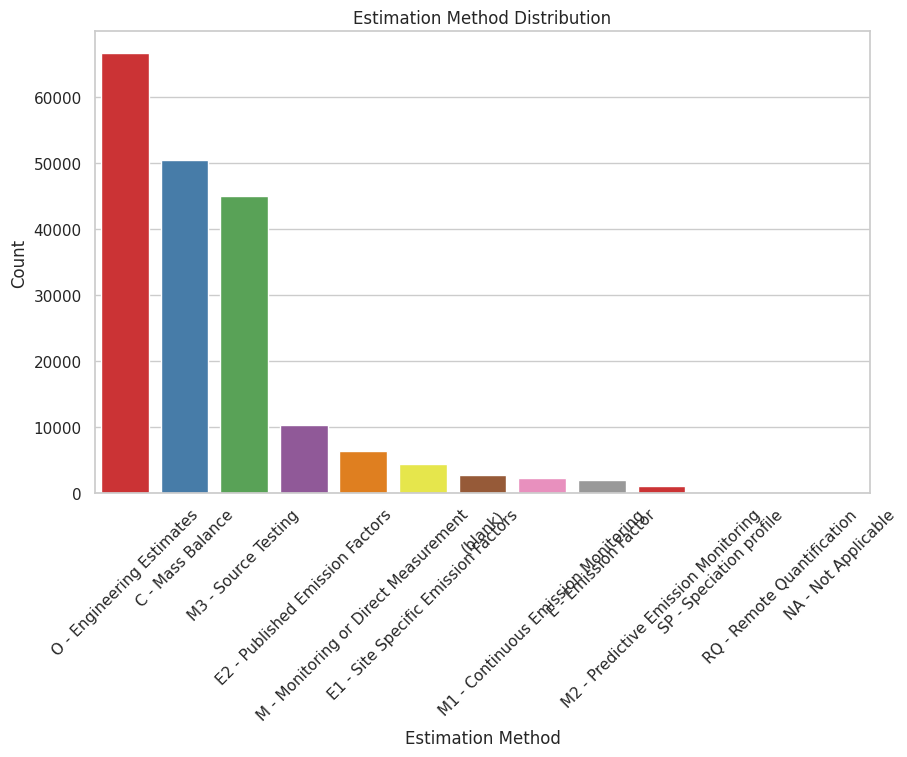

In [24]:
# Load your dataset (Make sure the file name is correct)
df = pd.read_csv("cleaned_disposals.csv", encoding="latin-1")  # Adjust encoding if needed
df.columns = df.columns.str.strip()  # Remove spaces

# Clean column names to handle encoding issues
df.columns = df.columns.str.strip().str.replace(r'[^\x00-\x7F]+', '', regex=True)

# Print the available columns to inspect
print(df.columns)

# Find the actual column name corresponding to 'Estimation_Method'
# It might be 'Estimation Method' or similar after cleaning
actual_column_name = next((col for col in df.columns if 'Estimation' in col), None)

if actual_column_name:
    # Count the occurrences of each estimation method using the actual column name
    estimation_method_count = df[actual_column_name].value_counts().reset_index()
    estimation_method_count.columns = ['Estimation Method', 'Count']

    # Bar plot for estimation method counts
    plt.figure(figsize=(10, 6))
    sns.barplot(data=estimation_method_count, x='Estimation Method', y='Count', palette='Set1')
    plt.title('Estimation Method Distribution')
    plt.xlabel('Estimation Method')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()
else:
    print("Column containing 'Estimation' not found in the DataFrame.")

